In [1]:
import pickle
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
results = pickle.load(open('/data/Mask_RCNN/result.pkl','rb'))

dict_keys(['score', 'image_id', 'bbox', 'category_id', 'segmentation'])
[245, 81, 47, 25]
/data/mio_tcd_seg/images/00110593.jpg
0.993715
2
1443
(228, 342)


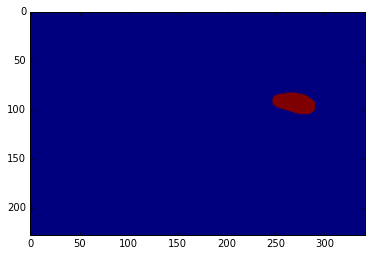

In [3]:
print(results[0].keys())
print(results[0]['bbox'])
print(results[0]['image_id'])
print(results[0]['score'])
print(results[0]['category_id'])
print(len(results))
print(results[0]['segmentation'].shape)

im = cv2.imread(results[0]['image_id'])
x1,y1,w,h = results[0]['bbox']
cv2.rectangle(im,(x1,y1),(x1+w,y1+h),(255,0,0),1)
plt.imshow(results[0]['segmentation'])

In [4]:
classes = ["articulated_truck", "bicycle", "bus", "car", "motorcycle",
               "non-motorized_vehicle", "motorized_vehicle",
               "pedestrian", "pickup_truck", "single_unit_truck", "work_van"]
acc = []
for v in results:
    x1,y1,w,h = v['bbox']
    f = v['image_id'].split('/')[-1][:-4]
    sc = v['score']
    cls = classes[v['category_id']+1]
    seg = v['segmentation']
    acc.append((f,cls,sc,x1,y1,x1+w,y1+h,seg))
print(acc[0])
with open('result.csv','w') as f:
    f.writelines([','.join([str(k1) for k1 in k[:-1]]) + '\n' for k in acc])

('00110593', 'car', 0.99371475, 245, 81, 292, 106, array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))


In [5]:
from collections import defaultdict
data = defaultdict(list)
for v in results:
    x1,y1,w,h = v['bbox']
    f = v['image_id'].split('/')[-1][:-4]
    sc = v['score']
    cls = classes[v['category_id']+1]
    seg = v['segmentation']
    data[v['image_id']].append((cls,sc,x1,y1,x1+w,y1+h,seg))

In [6]:
import os
pjoin = os.path.join
try:
    for k,v in data.items():
        im = cv2.imread(k)
        seg_im = np.zeros_like(im)
        for cls,sc,x1,y1,x2,y2,seg in v:
            seg_im[:,:,2] += seg
            cv2.rectangle(im,(x1,y1),(x2,y2),(255,0,0),1)
            cv2.putText(im,"{} {:10.4f}".format(cls,sc),(x1,y1+10),cv2.FONT_HERSHEY_COMPLEX,0.4,(255,0,0))
        im += (128*seg_im).astype(np.uint8)
        cv2.imshow('lol',im)
        cv2.imwrite(pjoin("/data/Mask_RCNN/output",k.split('/')[-1]), im)
        cv2.waitKey(1000)
except e:
    print(e)
    pass

NameError: name 'e' is not defined